## Feeding a dataset

In the part before we have seen how to set up a single-layer perceptron.

Now, we will be feeding a (real) dataset. There are two ways:

- specifying a file (CSV or TFRecord)
- specifying two numpy arrays

In [1]:
import TATi.simulation as tati

### Using a file

Let us first use a file, *dataset-twocluster.csv*.

The two-dimensional dataset looks as follows. To this end, we use `pandas`'s `read_csv()` function to the parse the file as a `DataFrame`. Next, we plot its features in columns "x1" and "x2" using `matplotlib`.

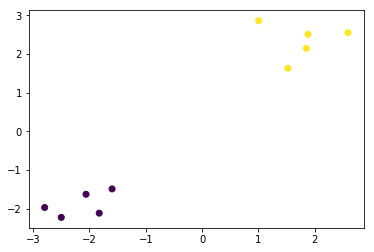

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv("dataset-twoclusters.csv", sep=",", header=0)
plt.scatter(dataset["x1"].values, dataset["x2"].values, c=dataset["label"].values)
plt.show()

As you see, there are two clusters of points with 10 points in total. Each cluster has a distinct label, {-1,1}.

We can feed this dataset right at instantiation of `tati`.

In [3]:
nn = tati(batch_data_files=["dataset-twoclusters.csv"],
          batch_data_file_type="csv",
          hidden_dimension=[0],
          hidden_activation="linear", output_activation="relu",
          loss="mean_squared")

We do not have to set **input_dimension** or **output_dimension** as these are taken from the dataset directly.

If we inspect the corresponding option, then we get the correct number of features per dataset item.

In [5]:
print(nn._options.get("input_dimension"))

2


We could also have fed the dataset *after* we instantiate `tati` using its `dataset` member.

In [7]:
nn = tati(hidden_dimension=[0],
          hidden_activation="linear", output_activation="relu",
          loss="mean_squared")

nn.dataset = "dataset-twoclusters.csv"
print(nn._options.get("input_dimension"))

2


### Using a numpy array

The member `dataset` understands both string (filenames) and list (containing two numpy arrays).

Here, we simply use the columns "x1" and "x2" as features and the column "label" as label of our initially parsed dataset file.

In [8]:
nn.dataset = [dataset[["x1", "x2"]].values, dataset[["label"]].values]

### Assessing the dataset

So, what have we actually fed?

We can inspect the whole dataset as follows.

In [9]:
print(nn.dataset)

(array([[-2.5009074, -2.2237325],
       [ 1.0061488,  2.8549778],
       [-2.0612319, -1.626756 ],
       [ 2.5928788,  2.5489697],
       [ 1.8527263,  2.143285 ],
       [ 1.5240172,  1.6271825],
       [-1.8271283, -2.113889 ],
       [ 1.8822099,  2.506151 ],
       [-1.598089 , -1.4883324],
       [-2.7957726, -1.968864 ]], dtype=float32), array([[-1.],
       [ 1.],
       [-1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [-1.],
       [ 1.],
       [-1.],
       [-1.]], dtype=float32))


The option **batch_size** has an influence on what we see when accessing `dataset`, namely the current batch only. The very same batch is also fed to the network when evaluating `loss()`, `gradients()`, and so on.

In [10]:
nn.set_options(batch_size=2)
nn.dataset = [dataset.loc[:,["x1", "x2"]].values, dataset.loc[:,["label"]].values]

In [11]:
print(nn.dataset)

(array([[-2.5009074, -2.2237325],
       [ 1.0061488,  2.8549778]], dtype=float32), array([[-1.],
       [ 1.]], dtype=float32))


With a **batch_size** of *2* we only get two items. 

Accessing `dataset` multiple times returns the same batch.

In [12]:
print(nn.dataset)

(array([[-2.5009074, -2.2237325],
       [ 1.0061488,  2.8549778]], dtype=float32), array([[-1.],
       [ 1.]], dtype=float32))


If you want to trigger skipping to the next batch, do as follows.

In [17]:
nn._cache.reset()
print(nn.dataset)

(array([[-2.5009074, -2.2237325],
       [ 1.0061488,  2.8549778]], dtype=float32), array([[-1.],
       [ 1.]], dtype=float32))


Now, we have obtained the next batch of two items (features and labels).

However, triggering the next batch is easier by simply looking at loss, gradients and related objects. We'll come to this in the next part.

#### Note on shuffling

Shuffling the dataset is important especially when mini-batching, i.e. batch size is smaller than the dimension of the dataset.

However, `tati` does not do any shuffling. In more detail, it does by default not instruct `tensorflow` to shuffle.

This is to avoid double occurring items in batches when `max_steps` is larger 1 and batch_size *is* equal to the dataset dimension: `tensorflow` does not shuffle per epoch but over the full repeated dataset.

In other words, if you use mini-batching, make sure the dataset is properly shuffled before feeding it.

### Summary

- feeding a dataset file
- feeding a dataset as features and label numpy arrays
- influence of `batch_size` on the dataset
- shuffling the dataset